# <font color='blue'>CCPS 844 Data Mining Module 2 Using Gini Index</font>

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are commonly used in operations research, specifically in decision analysis, to help identify a strategy most likely to reach a goal, but are also a popular tool in machine learning.

In [1]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading data from a URL**

In [2]:
balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
                           sep= ',', header= None)

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:997)>

**Number of records in the dataset**

In [3]:
print( "Dataset Lenght:: ", len(balance_data))
print ("Dataset Shape:: ", balance_data.shape)

Dataset Lenght::  625
Dataset Shape::  (625, 5)


In [4]:
balance_data.head()

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


**Independent variables in X and class variable in Y**

In [5]:
X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]

In [6]:
X

array([[1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 3],
       ..., 
       [5, 5, 5, 3],
       [5, 5, 5, 4],
       [5, 5, 5, 5]], dtype=object)

In [7]:
Y

array(['B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L',
       'B', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L',
       'B', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L',
       'B', 'R', 'L', 'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L',
       'B', 'L', 'L', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'L', 'R',
       'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'L', 'B', 'R', 'R', 'R',
       'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'B', 'R', 'L',
       'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L

**Importing a library which helps to split in train and test**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [10]:
from sklearn.tree import DecisionTreeClassifier

**Importing a method which helps to split the historical data in train and test**

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(y_test,predictions))

[[ 0  6  7]
 [11 71  3]
 [ 9  2 79]]


In [16]:
conf_mat = confusion_matrix(y_test,predictions)

In [17]:
conf_mat

array([[ 0,  6,  7],
       [11, 71,  3],
       [ 9,  2, 79]], dtype=int64)

In [18]:
dtree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
import graphviz 
from sklearn import tree

In [20]:
dot_data = tree.export_graphviz(dtree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("balance_data") 

'balance_data.pdf'

In [21]:
import numpy as np 
print(balance_data.columns)
#removing the class variable
featureNames = np.delete(balance_data.columns, 0)
featureNames

Int64Index([0, 1, 2, 3, 4], dtype='int64')


Int64Index([1, 2, 3, 4], dtype='int64')

In [22]:
target_names = np.array(list(set(balance_data.values[:,0])))
target_names

array(['L', 'R', 'B'],
      dtype='<U1')

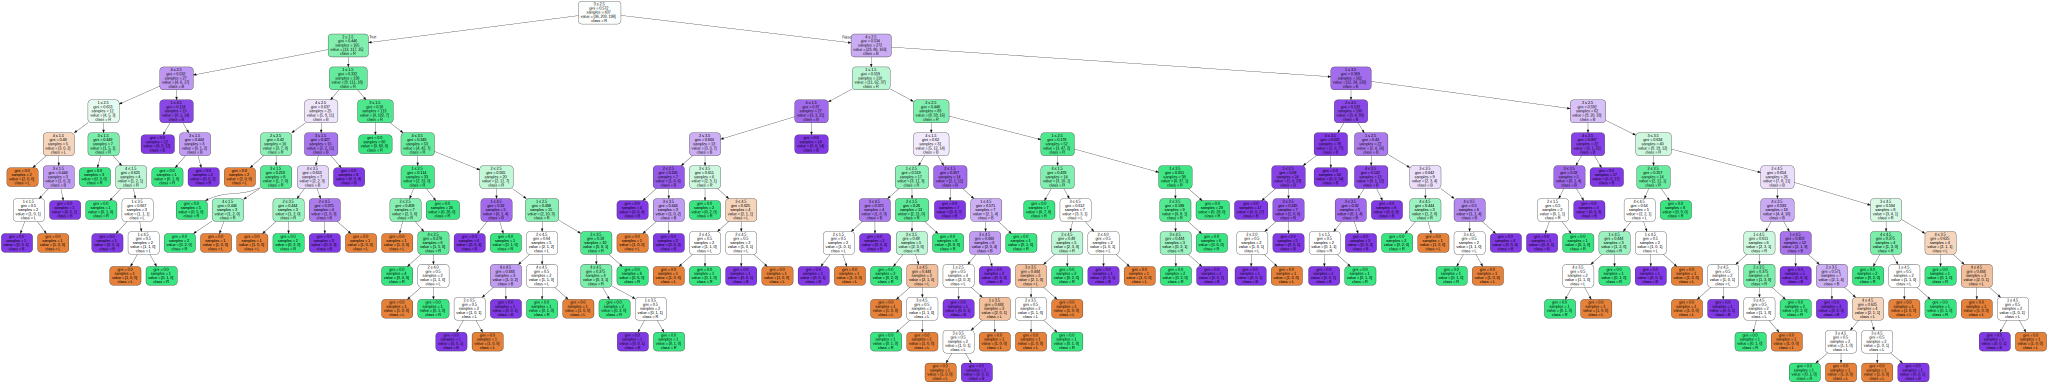

In [23]:
dot_data = tree.export_graphviz(dtree, out_file=None, 
                       feature_names=featureNames,  
                       class_names=target_names,  
                       filled=True, rounded=True,  
                       special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

**© Dr. Muhammad Naeem Irfan. Can't be posted on the internet**